In the project we are going to use a Nueral etwork to predict if a person will repay a loan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_info = pd.read_csv('lending_club_info.csv', index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


In [6]:
df=pd.read_csv('lending_club_loan_two.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

Some of the rows have null data. I will have to look at that and correct.

<Axes: xlabel='loan_status', ylabel='count'>

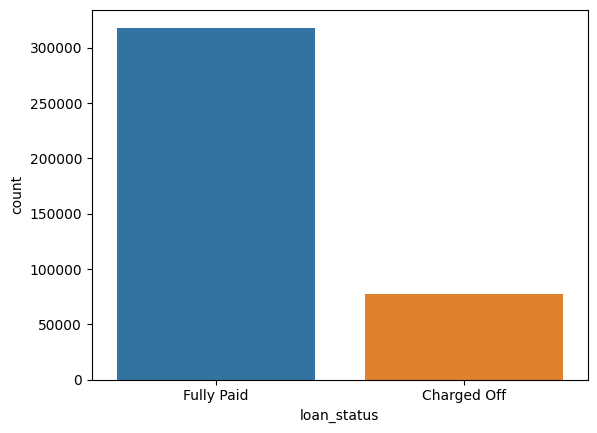

In [8]:
sns.countplot(x='loan_status', data=df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


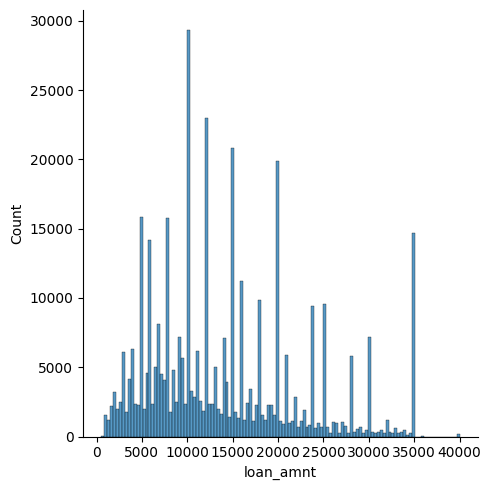

In [9]:
sns.displot(df['loan_amnt'], kde=False)

/var/folders/wz/wdfk34nj63sds6m2z08s4_9r0000gn/T/ipykernel_70136/287210066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'])


<Axes: xlabel='loan_amnt', ylabel='Density'>

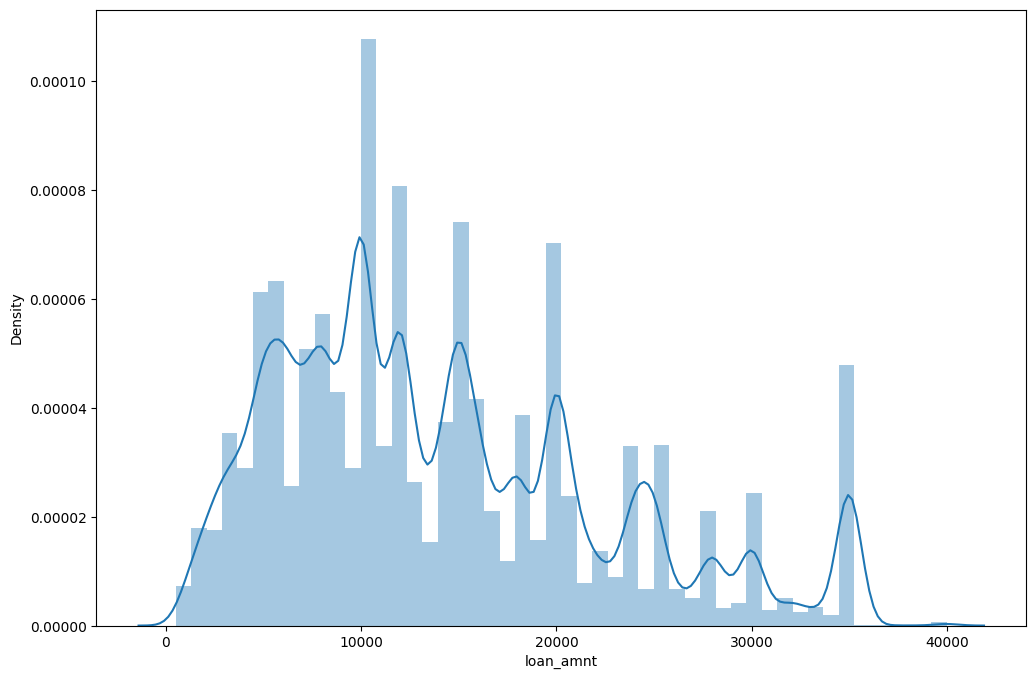

In [10]:
plt.figure(figsize=(12,8))
sns.distplot(df['loan_amnt'])

In [11]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

In [120]:
df.corr(numeric_only=True)

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
loan_amnt,1.000000,0.393731,0.168599,0.953872,0.337364,0.016338,-0.147380,0.198347,-0.078143,0.328515,...,-0.174397,-0.011669,0.019500,-0.000608,-0.010602,-0.000204,0.001001,0.000989,0.019682,0.021537
term,0.393731,1.000000,0.434455,0.153040,0.060302,0.036276,-0.029276,0.079345,-0.018993,0.084734,...,-0.092305,-0.031271,0.058019,-0.000160,-0.029288,-0.001271,0.001019,0.003751,0.062450,0.055320
int_rate,0.168599,0.434455,1.000000,0.162442,-0.057035,0.078758,0.108216,0.011753,0.060857,-0.011290,...,0.073065,-0.045262,0.086677,-0.001218,-0.042421,0.000695,0.000693,0.000941,0.085446,0.083114
installment,0.953872,0.153040,0.162442,1.000000,0.330855,0.015511,-0.132187,0.188815,-0.068220,0.316664,...,-0.146736,-0.008257,0.013797,-0.000748,-0.008034,0.000174,0.000858,-0.000004,0.012615,0.016102
annual_inc,0.337364,0.060302,-0.057035,0.330855,1.000000,-0.081730,-0.140571,0.136620,-0.013718,0.299758,...,-0.144902,0.009082,-0.017721,-0.002023,0.008353,0.001218,-0.000309,-0.000332,-0.019192,-0.015787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30723,-0.000204,-0.001271,0.000695,0.000174,0.001218,0.003885,0.002172,0.003132,0.001285,-0.000866,...,0.000569,-0.146801,-0.069710,-0.166486,-0.146971,1.000000,-0.165449,-0.167289,-0.068903,-0.069441
48052,0.001001,0.001019,0.000693,0.000858,-0.000309,-0.000971,0.000428,0.000564,-0.002109,0.001556,...,-0.000904,-0.145903,-0.069284,-0.165468,-0.146072,-0.165449,1.000000,-0.166266,-0.068481,-0.069016
70466,0.000989,0.003751,0.000941,-0.000004,-0.000332,-0.000865,0.001283,-0.002058,-0.000991,-0.002102,...,-0.001251,-0.147526,-0.070054,-0.167308,-0.147697,-0.167289,-0.166266,1.000000,-0.069243,-0.069784
86630,0.019682,0.062450,0.085446,0.012615,-0.019192,0.020679,0.012810,0.009800,0.004759,-0.001925,...,0.021868,-0.060763,-0.028854,-0.068911,-0.060833,-0.068903,-0.068481,-0.069243,1.000000,-0.028742


<Axes: >

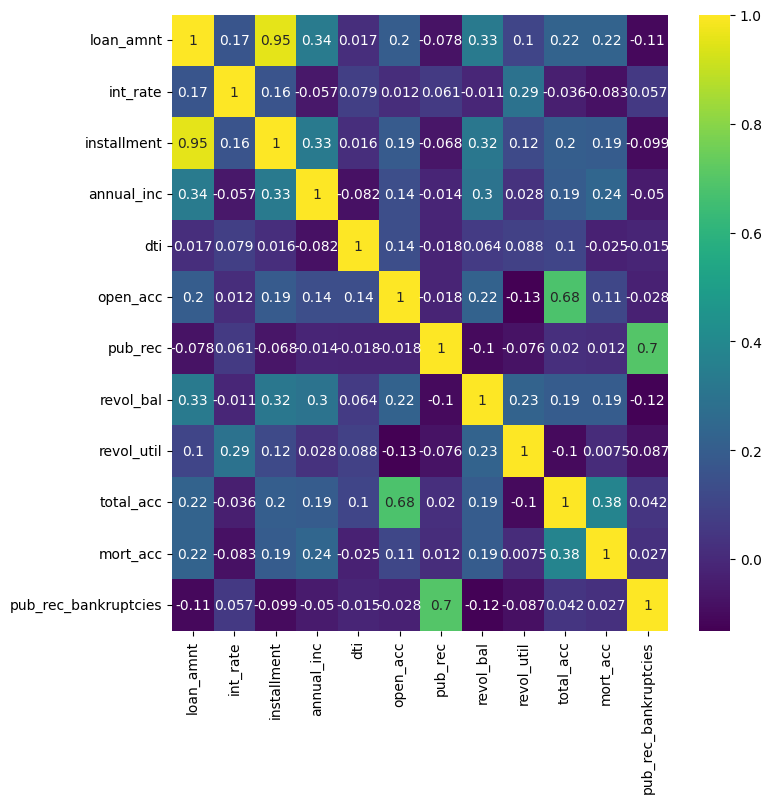

In [123]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

In [14]:
feat_info('pub_rec')

Number of derogatory public records


In [15]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [16]:
feat_info('open_acc')

The number of open credit lines in the borrower's credit file.


In [17]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [18]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

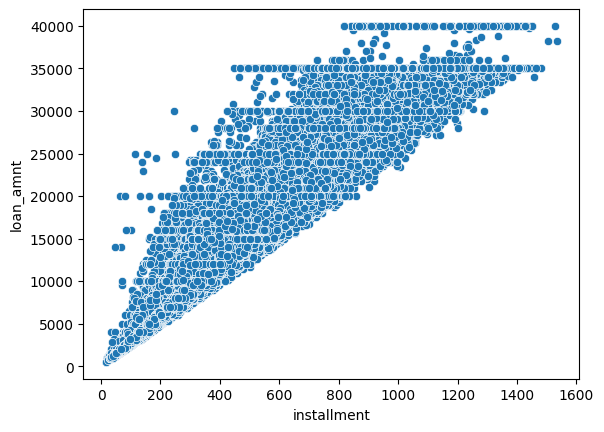

In [19]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

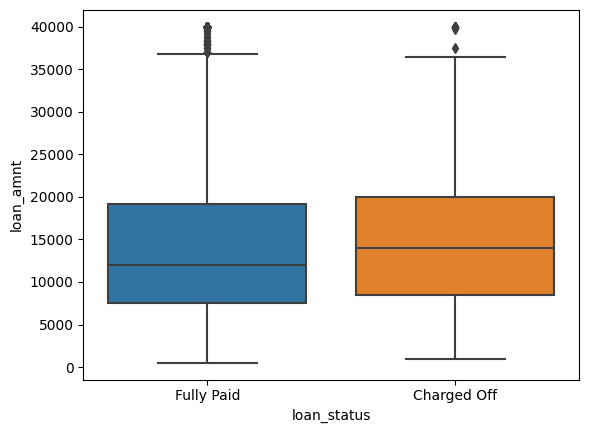

In [20]:
sns.boxplot(x='loan_status', y='loan_amnt', data = df)

In [21]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [22]:
df.columns


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [23]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [24]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [124]:
plt.figure(figsize=(7,5))
grade_order = sorted(df['grade'].unique())
sns.countplot(x='grade', hue='loan_status', data=df, order=grade_order)

KeyError: 'grade'

<Figure size 700x500 with 0 Axes>

<Axes: xlabel='sub_grade', ylabel='count'>

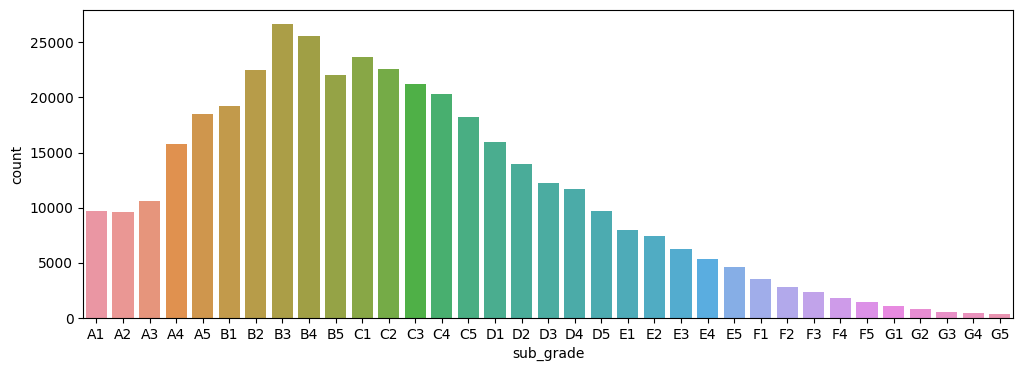

In [26]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=sub)

<Axes: xlabel='sub_grade', ylabel='count'>

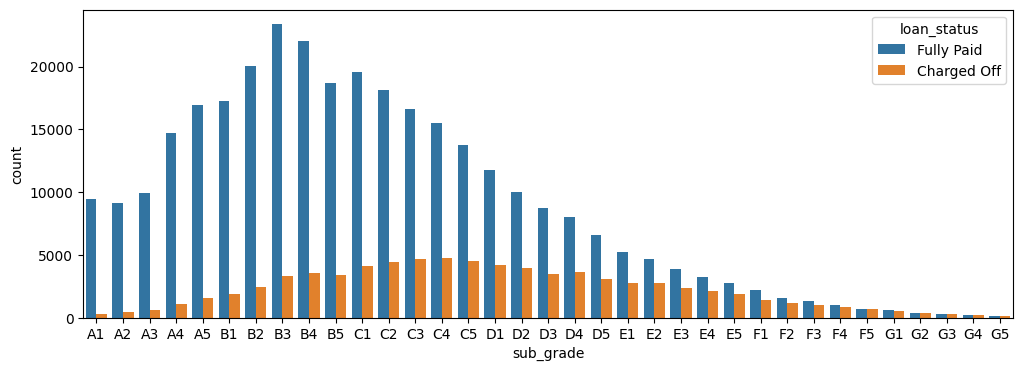

In [27]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', hue = 'loan_status', data=df, order=subgrade_order)

<Axes: xlabel='sub_grade', ylabel='count'>

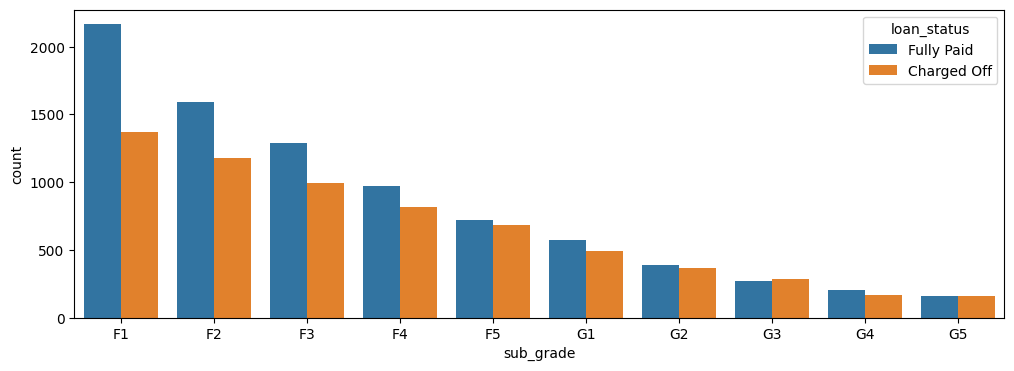

In [28]:
f_and_g = df[(df['grade']=='F') | (df['grade']=='G')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade', hue = 'loan_status', data=f_and_g, order=subgrade_order)

In [30]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [31]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<Axes: >

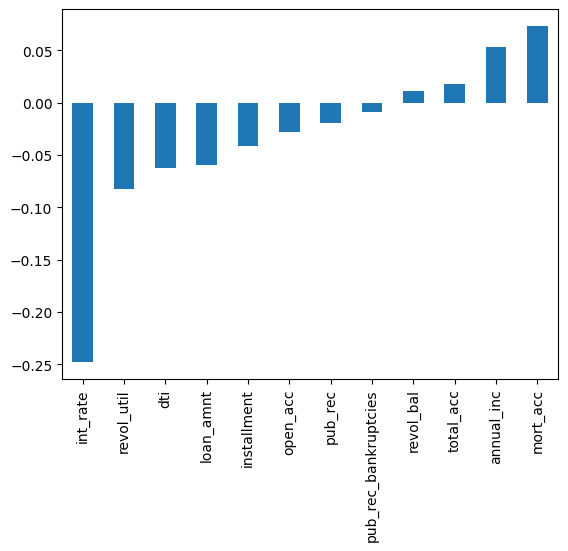

In [32]:

df.corr(numeric_only=True)['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

lets look for the missing data

In [33]:
len(df)

396030

In [34]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [35]:
# this should give a percentage of the whole for the missing
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [36]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [37]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [38]:
df['emp_title'].nunique()

173105

In [39]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

why so many teachers????? we need to drop employment titles along axis


In [40]:
df=df.drop('emp_title', axis = 1)

In [41]:
df['emp_length'].value_counts()

emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64

In [42]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [43]:
sorted_length_order = [
 '< 1 year', 
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
'10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

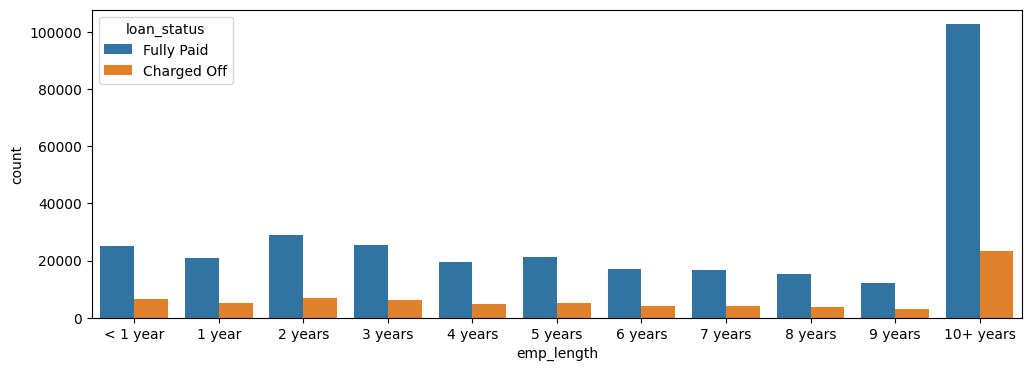

In [44]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',  data=df,hue= 'loan_status', order=sorted_length_order)

In [45]:
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [46]:
emp_fp= df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [47]:
emp_len = emp_co/(emp_fp+emp_co)

<Axes: xlabel='emp_length'>

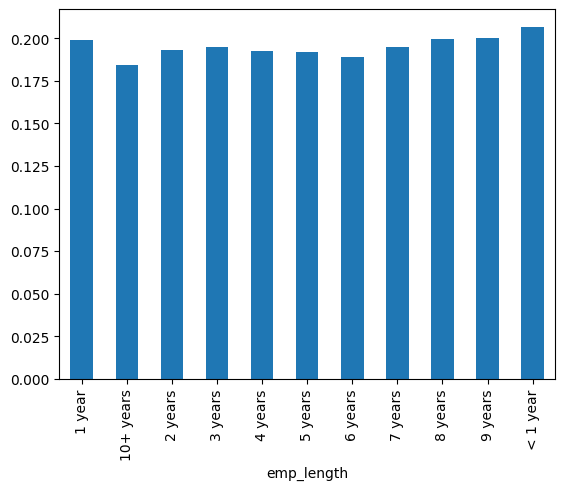

In [48]:
emp_len.plot(kind='bar')

So the point of this was to see if I trully had to dig into the empl length column and repair the missing data. It seem a very poor indicator of weather someone will pay back a loan or not. Since they are similar we can just drop.

In [49]:
df = df.drop('emp_length', axis=1)

In [50]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

4 missing features left to deal with

In [51]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [52]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

these are redundant columns


In [53]:
df = df.drop('title', axis=1)

In [54]:
feat_info('mort_acc')

Number of mortgage accounts.


In [55]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

fill it in or delete the feature. Can we use a correlated column?

In [56]:
df.corr(numeric_only=True)['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [57]:
 total_account_averages = df.groupby('total_acc')['mort_acc'].mean()

okay, using the total accounts as a kind of dictionary for average number of mortgage accounts I am going to fill in the blanks

In [58]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_account_averages[total_acc]
    else:
        return mort_acc

In [59]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [60]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

the last two are very small portionas of the overall data set. I will just drop them

In [61]:
df = df.dropna()

In [62]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

now for categorial data and string data, do we keep?

In [63]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

lots of objects.......

In [64]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [65]:
df['term'].value_counts()

term
 36 months    301247
 60 months     93972
Name: count, dtype: int64

In [66]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [67]:
df['term'].value_counts()

term
36    301247
60     93972
Name: count, dtype: int64

In [68]:
df = df.drop('grade', axis = 1)

convert subgrade to dummt variables.

In [69]:
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

In [70]:
df = pd.concat([df.drop('sub_grade', axis=1),dummies], axis=1)

In [71]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [72]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [73]:
dummies = pd.get_dummies(df[['verification_status', 'purpose', 'initial_list_status','application_type']], drop_first=True)

df = pd.concat([df.drop(['verification_status', 'purpose', 'initial_list_status','application_type'], axis=1),dummies], axis=1)

In [74]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [75]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

move the none and any into other

In [76]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'],'OTHER')

In [77]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: count, dtype: int64

In [78]:
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)

df = pd.concat([df.drop(['home_ownership'], axis=1),dummies], axis=1)

In [79]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [80]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [81]:
df['zip_code'].value_counts()

zip_code
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

In [82]:
dummies = pd.get_dummies(df['zip_code'], drop_first=True)

df = pd.concat([df.drop(['zip_code'], axis=1),dummies], axis=1)

In [83]:
df = df.drop('address', axis=1)

In [84]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

In [85]:
feat_info('issue_d')

The month which the loan was funded


So we won't have this when we are modeling a loan so why include it in the model?

In [86]:
df = df.drop('issue_d', axis = 1)

In [87]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'earliest_cr_line'], dtype='object')

In [88]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [89]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [90]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [91]:
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

In [125]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_JOINT', 'OTHER', 'OWN',
       'RENT', '05113', '11650', '22690

In [93]:
df = df.drop('loan_status', axis = 1)

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X = df.drop('loan_repaid', axis = 1).values

In [96]:
y = df['loan_repaid'].values

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
scaler = MinMaxScaler()

In [100]:
X_train = scaler.fit_transform(X_train)

In [101]:
X_test = scaler.transform(X_test)

In [102]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2023-08-26 23:18:51.566199: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [103]:
X_train.shape

(316175, 78)

In [104]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [105]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size = 256, validation_data=(X_test, y_test))

Epoch 1/25
1236/1236 [==============================] - 5s 3ms/step - loss: 0.3010 - val_loss: 0.2650
Epoch 2/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2653 - val_loss: 0.2633
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2630 - val_loss: 0.2625
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2617 - val_loss: 0.2631
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2613 - val_loss: 0.2620
Epoch 6/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2603 - val_loss: 0.2618
Epoch 7/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2599 - val_loss: 0.2614
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2595 - val_loss: 0.2614
Epoch 9/25
1236/1236 [==============================] - 4s 4ms/step - loss: 0.2593 - val_loss: 0.2613
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.259

<Axes: >

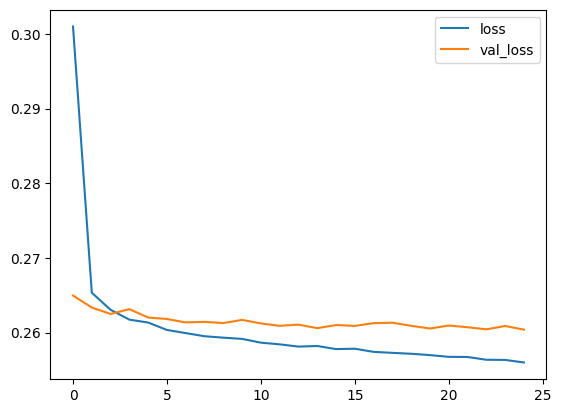

In [106]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [107]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 3s 1ms/step


In [108]:
model.save('loan.keras')

In [109]:
from sklearn.metrics import classification_report, confusion_matrix

In [110]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 6916  8650]
 [  260 63218]]
              precision    recall  f1-score   support

           0       0.96      0.44      0.61     15566
           1       0.88      1.00      0.93     63478

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [111]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [112]:
from tensorflow.keras.callbacks import EarlyStopping

In [113]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [114]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size = 256, validation_data=(X_test, y_test))

Epoch 1/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.3136 - val_loss: 0.2648
Epoch 2/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2689 - val_loss: 0.2646
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2658 - val_loss: 0.2644
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2642 - val_loss: 0.2635
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2636 - val_loss: 0.2629
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2626 - val_loss: 0.2627
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2618 - val_loss: 0.2625
Epoch 8/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2614 - val_loss: 0.2626
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2612 - val_loss: 0.2634
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.260

<Axes: >

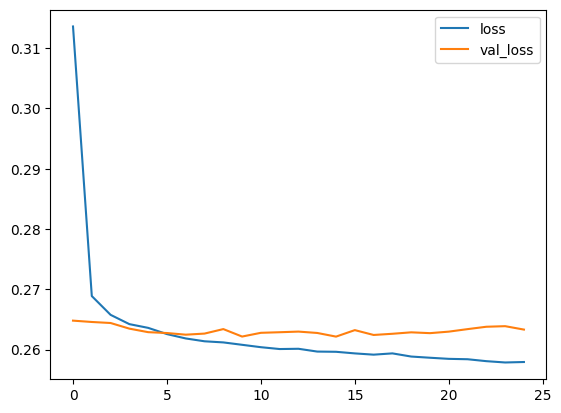

In [115]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [116]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 2s 895us/step


In [117]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 6631  8935]
 [    3 63475]]
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15566
           1       0.88      1.00      0.93     63478

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044

